In [6]:
# Reading the images:
import matplotlib.pyplot as plt
import csv
from tqdm import tqdm

def readTrafficSigns(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    for c in tqdm(range(0,43)):
        #print(c)
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader) # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
    return images, labels

images, labels = readTrafficSigns("GermanDataset\\GTSRB_Final_Training_Images\\GTSRB\\Final_Training\\Images")
print(images[0])
print(labels[0])

100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [00:13<00:00,  3.11it/s]


[[[ 75  78  80]
  [ 74  76  78]
  [ 86  87  84]
  ...
  [ 68  75  75]
  [ 65  69  68]
  [ 66  67  66]]

 [[ 83  84  86]
  [ 80  80  82]
  [ 90  89  84]
  ...
  [ 73  77  78]
  [ 76  78  75]
  [ 80  80  78]]

 [[ 78  78  80]
  [ 86  85  86]
  [ 93  90  91]
  ...
  [ 72  74  72]
  [ 73  74  69]
  [ 78  78  74]]

 ...

 [[133 134 139]
  [122 127 132]
  [112 121 124]
  ...
  [ 94  94  89]
  [ 97  98  91]
  [ 99 103  99]]

 [[ 91  95  99]
  [ 91  98 103]
  [ 74  85  89]
  ...
  [103 101  95]
  [110 113 104]
  [ 96 104  98]]

 [[ 85  84  87]
  [ 95 101 107]
  [ 61  74  79]
  ...
  [102 102  95]
  [ 99 102  90]
  [ 90  97  89]]]
0


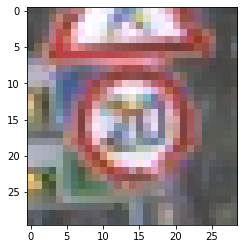

In [7]:
plt.imshow(images[0])

In [10]:
print(type(images[0]))
print(len(images[0]))

<class 'numpy.ndarray'>
30


In [24]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import csv
from PIL import Image

In [36]:
REBUILD_DATA = True # Set it to true once!!

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

#img = mpimg.imread('image.png')     
#gray = rgb2gray(img)    
#plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
#plt.show()


if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

class StreetSigns():
    imageSize = 50
    #labels = {cats : 0, dogs : 1} # TODO Later
    labels = [] # maybe not needed TODO
    trainingData = []
    def makeTrainingData(self, rootpath):
        for c in tqdm(range(0,43)):
        #print(c)
            prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
            gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
            gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
            next(gtReader) # skip header
            # loop over all images in current annotations file
            for row in gtReader:
                img = plt.imread(prefix + row[0])
                img = cv2.resize(img, (self.imageSize, self.imageSize))
                img = np.array(img)
                #plt.imshow(img)
                img = rgb2gray(img) 
                label = int(row[7])
                self.labels.append(label) # the 8th column is the label
                self.trainingData.append([np.array(img), np.eye(43)[self.labels[label]]])

            gtFile.close()
                
                
        np.random.shuffle(self.trainingData)
        np.save("StreetSignsData.npy", self.trainingData)
        
        
if REBUILD_DATA:
    streetSigns = StreetSigns()
    streetSigns.makeTrainingData("GermanDataset\\GTSRB_Final_Training_Images\\GTSRB\\Final_Training\\Images")

  0%|                                                                                           | 0/43 [00:00<?, ?it/s]

Running on the GPU


100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [01:25<00:00,  1.98s/it]


In [37]:
trainingData = np.load("StreetSignsData.npy", allow_pickle = True)
print(len(trainingData))
print(trainingData[0])

39209
[array([[30.2852, 29.5734, 28.8616, ..., 28.5735, 28.8724, 29.5734],
       [31.8721, 30.5733, 28.9756, ..., 28.1606, 28.2746, 28.2746],
       [32.986 , 30.6873, 28.9756, ..., 26.5629, 27.2639, 27.2639],
       ...,
       [20.4818, 20.8947, 21.7806, ..., 28.3455, 27.5736, 27.2747],
       [20.4818, 20.8947, 21.1936, ..., 27.8725, 28.2746, 28.0897],
       [20.8947, 20.8947, 20.8947, ..., 27.8725, 28.2746, 29.0896]])
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])]


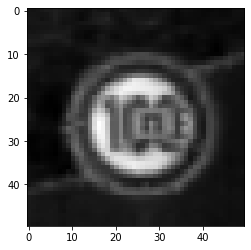

In [38]:
# Let's show a picture
plt.imshow(trainingData[1][0], cmap="gray")
plt.show()